# SIMULACION

## VINICIO VELETANGA

### Práctica



In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np
%matplotlib inline


#SE PARAMETRIZA LOS VALORES A USAR
HOSPITALES = 2
HOSPITAL_CAMA_A = 10
HOSPITAL_CAMA_B = 10
HOSPITAL_VENT_A = 4
HOSPITAL_VENT_B = 4
INFECTADOS = 20
TASA_CRECIMIENTO = 7
PERSONAL_MEDICO = 150
DIAS_INTERNADO = 10
DIAS_SIMULACION = 20
persona_recuperadas={}
persona_fallecidas={}

In [ ]:
# pip install simpy

In [4]:
class Hospital(object):
    def __init__(self, env, num_cama, name):
            self.env = env
            self.num_cama = num_cama
            self.camas = simpy.Resource(env, num_cama)
            self.name = name
            
    def ingresar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("El paciente terminó de revisarse: ", paciente, " tiempo de salida: ", self.env.now, " hospital ", self.name)
              


def ingreso_paciente(env, hospital, paciente):
    arrive = env.now
    estado = random.randint(1,100)
    if (estado < 60):
        with hospital.camas.request() as cama:
            dias_esperando = random.randint(1,5) 
            requerimiento = yield cama | env.timeout(dias_esperando)
            wait = env.now - arrive
            if cama in requerimiento:
                print("Al paciente: ", paciente, " se le asigna una cama ", " hospital " , hospital.name)
                yield env.process(hospital.ingresar_paciente(paciente))
                estado = random.randint(1,100)
                if (estado < 8) :
                    persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
            else:
                print("El paciente " , paciente, " en el hospital ", hospital.name, " espero ", wait , " dias y fallece no hay camas")
                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1        
    else :
        print("El paciente no presenta covid : ", paciente, " hospital ", hospital.name )

def asignar_hospital(env, hospitalA, hospitalB, paciente):
    hosp_esc = random.randint(1,2)
    if (hosp_esc == 1):
        print("Llega el paciente ", paciente, " al hospital 'A' en el tiempotiempo ", env.now)
        env.process(ingreso_paciente(env, hospitalA, paciente))
    else:
        print("Llega el paciente ", paciente, " al hospital 'B' en el tiempo ", env.now)
        env.process(ingreso_paciente(env, hospitalB, paciente))
        
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HOSPITAL_CAMA_A, "A")
    hospitalB = Hospital(env, HOSPITAL_CAMA_B, "B")
    for i in range(infectados):
        asignar_hospital(env, hospitalA, hospitalB, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospitalA, hospitalB, paciente)

In [6]:

print("Simulación-Vinicio Veletanga")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)


print("Pacientes recuperados:")
print(persona_recuperadas)
print("Pacientes fallecidos:")
print(persona_fallecidas)



Simulación-Vinicio Veletanga
Llega el paciente  0  al hospital 'B' en el tiempo  0
Llega el paciente  1  al hospital 'A' en el tiempotiempo  0
Llega el paciente  2  al hospital 'B' en el tiempo  0
Llega el paciente  3  al hospital 'A' en el tiempotiempo  0
Llega el paciente  4  al hospital 'B' en el tiempo  0
Llega el paciente  5  al hospital 'A' en el tiempotiempo  0
Llega el paciente  6  al hospital 'A' en el tiempotiempo  0
Llega el paciente  7  al hospital 'B' en el tiempo  0
Llega el paciente  8  al hospital 'A' en el tiempotiempo  0
Llega el paciente  9  al hospital 'B' en el tiempo  0
Llega el paciente  10  al hospital 'A' en el tiempotiempo  0
Llega el paciente  11  al hospital 'A' en el tiempotiempo  0
Llega el paciente  12  al hospital 'A' en el tiempotiempo  0
Llega el paciente  13  al hospital 'B' en el tiempo  0
Llega el paciente  14  al hospital 'B' en el tiempo  0
Llega el paciente  15  al hospital 'A' en el tiempotiempo  0
Llega el paciente  16  al hospital 'A' en el ti

Llega el paciente  147  al hospital 'A' en el tiempotiempo  19
Llega el paciente  148  al hospital 'A' en el tiempotiempo  19
Llega el paciente  149  al hospital 'B' en el tiempo  19
Llega el paciente  150  al hospital 'B' en el tiempo  19
Llega el paciente  151  al hospital 'A' en el tiempotiempo  19
Llega el paciente  152  al hospital 'A' en el tiempotiempo  19
Llega el paciente  153  al hospital 'B' en el tiempo  19
El paciente no presenta covid :  149  hospital  B
El paciente no presenta covid :  150  hospital  B
El paciente no presenta covid :  153  hospital  B
El paciente  135  en el hospital  A  espero  2  dias y fallece no hay camas
Al paciente:  144  se le asigna una cama   hospital  B
Pacientes recuperados:
{6: 6, 8: 3, 10: 5, 11: 6, 12: 6, 13: 1, 14: 5, 15: 5, 16: 4, 17: 6, 18: 3, 19: 2, 7: 2, 9: 3}
Pacientes fallecidos:
{4: 2, 5: 3, 6: 9, 8: 5, 9: 5, 10: 3, 11: 4, 13: 5, 14: 4, 15: 7, 16: 4, 17: 5, 19: 2, 7: 1}


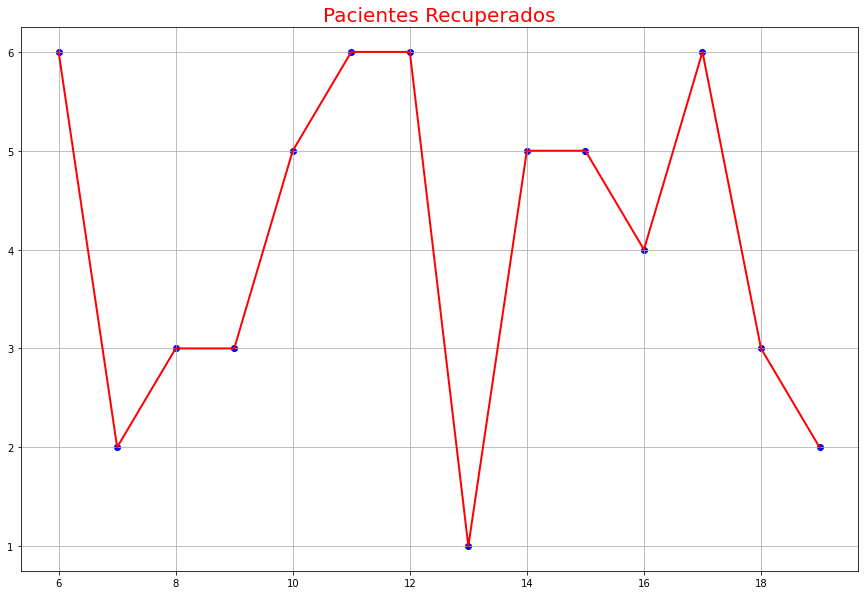

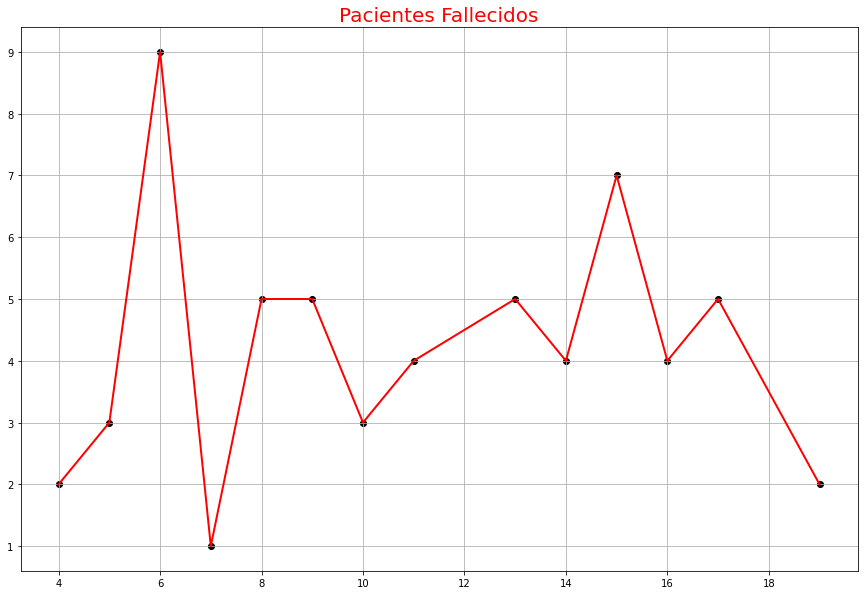

In [7]:
datos=sorted(persona_recuperadas.items()) 
x, y =zip(*datos) 
pp.figure(figsize=(15,10))
pp.plot(x,y,linewidth=2,color='red') 
pp.scatter(x,y,color='blue') 
pp.title("Pacientes Recuperados",color="red",size=20)
pp.grid(True) 
pp.show()

if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items())
    pp.figure(figsize=(15,10))
    x, y =zip(*datos) 
    pp.plot(x,y,linewidth=2,color='red') 
    pp.scatter(x,y,color='black') 
    pp.title("Pacientes Fallecidos",color="red",size=20)
    pp.grid(True) 
    pp.show()